In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [19]:
df_cleaned = pd.read_csv("../data/split/train.csv")

# I. DATASET OVERVIEW

In [20]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5091 entries, 0 to 5090
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_name  5091 non-null   object
 1   description   5091 non-null   object
 2   brand         5091 non-null   object
 3   category      5091 non-null   object
 4   text          5091 non-null   object
 5   label         5091 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 238.8+ KB


## 1. Phân bổ số lượng theo category

In [21]:
category_counts = df_cleaned["category"].value_counts()
print("Tổng số category:", category_counts.shape[0])
print("Các category và số lượng sản phẩm tương ứng:")
category_counts

Tổng số category: 12
Các category và số lượng sản phẩm tương ứng:


category
Thể thao & Du lịch       452
Nhà cửa & Đời sống       451
Thực phẩm & Đồ uống      451
Thời trang Nam           433
Điện thoại & Phụ kiện    422
Giày dép                 420
Mỹ phẩm & Làm đẹp        419
Đồ gia dụng              419
Đồ chơi trẻ em           419
Thời trang nữ            419
Sách & Văn phòng phẩm    419
Laptop & Máy tính        367
Name: count, dtype: int64

/var/folders/sp/zbn29lqn02g4m4zhf168jm5r0000gn/T/ipykernel_91441/3333990802.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


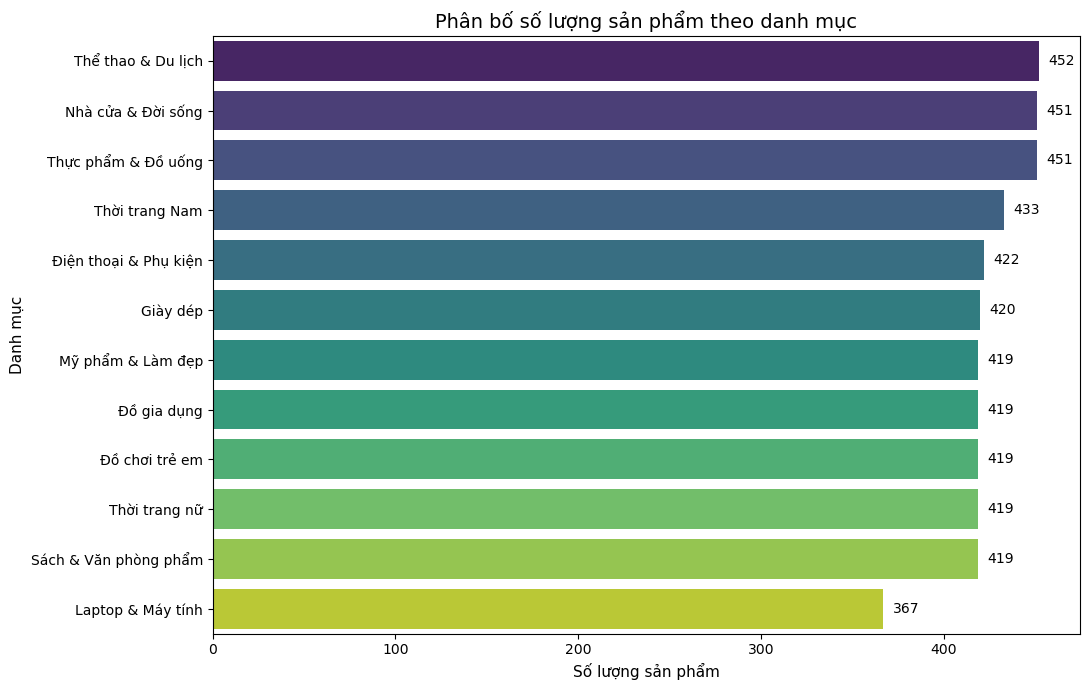

In [22]:
plt.figure(figsize=(11, 7))

ax = sns.countplot(
    y="category",
    data=df_cleaned,
    order=df_cleaned["category"].value_counts().index,
    palette="viridis"
)

plt.title("Phân bố số lượng sản phẩm theo danh mục", fontsize=14)
plt.xlabel("Số lượng sản phẩm", fontsize=11)
plt.ylabel("Danh mục", fontsize=11)

for p in ax.patches:
    width = p.get_width()
    ax.text(
        width + 5,                      
        p.get_y() + p.get_height() / 2,
        f"{int(width)}",
        va="center",
        fontsize=10
    )

plt.tight_layout()
plt.savefig("../visualizations/01_class_balance.png", dpi=300)
plt.show()

## 2. Phân bố Brand

In [23]:
brand_counts = df_cleaned["brand"].value_counts()
num_single_brands = (brand_counts == 1).sum()
print("Số brand:", df_cleaned["brand"].nunique())
print("Số brand chỉ xuất hiện 1 lần:", num_single_brands)
print("Tỷ lệ brand chỉ xuất hiện 1 lần: {:.2f}%".format(num_single_brands / len(brand_counts) * 100))
print("\nTop 20 brand phổ biến nhất:")

top_brands = df_cleaned["brand"].value_counts().nlargest(20)
top_brands

Số brand: 1254
Số brand chỉ xuất hiện 1 lần: 673
Tỷ lệ brand chỉ xuất hiện 1 lần: 53.67%

Top 20 brand phổ biến nhất:


brand
OEM                    415
Thực phẩm & Đồ uống    130
VITAMIN HOUSE           80
Haint Boutique          61
Deli                    58
Xiaomi                  58
Biti's                  54
BIGGBEN                 52
Naturehike              50
UNDER ARMOUR            46
Elmich                  41
Coleman                 40
Samsung                 36
Philips                 35
NXB Trẻ                 33
Kissme                  33
SPEEDO                  33
Rosata                  33
CROCS                   32
LocknLock               32
Name: count, dtype: int64

In [24]:
brand_category_diversity = (
    df_cleaned
    .groupby("brand")["category"]
    .nunique()
    .sort_values(ascending=False)
)

brand_category_diversity.describe()

count    1254.000000
mean        1.074163
std         0.331991
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         6.000000
Name: category, dtype: float64

/var/folders/sp/zbn29lqn02g4m4zhf168jm5r0000gn/T/ipykernel_91441/2558250014.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


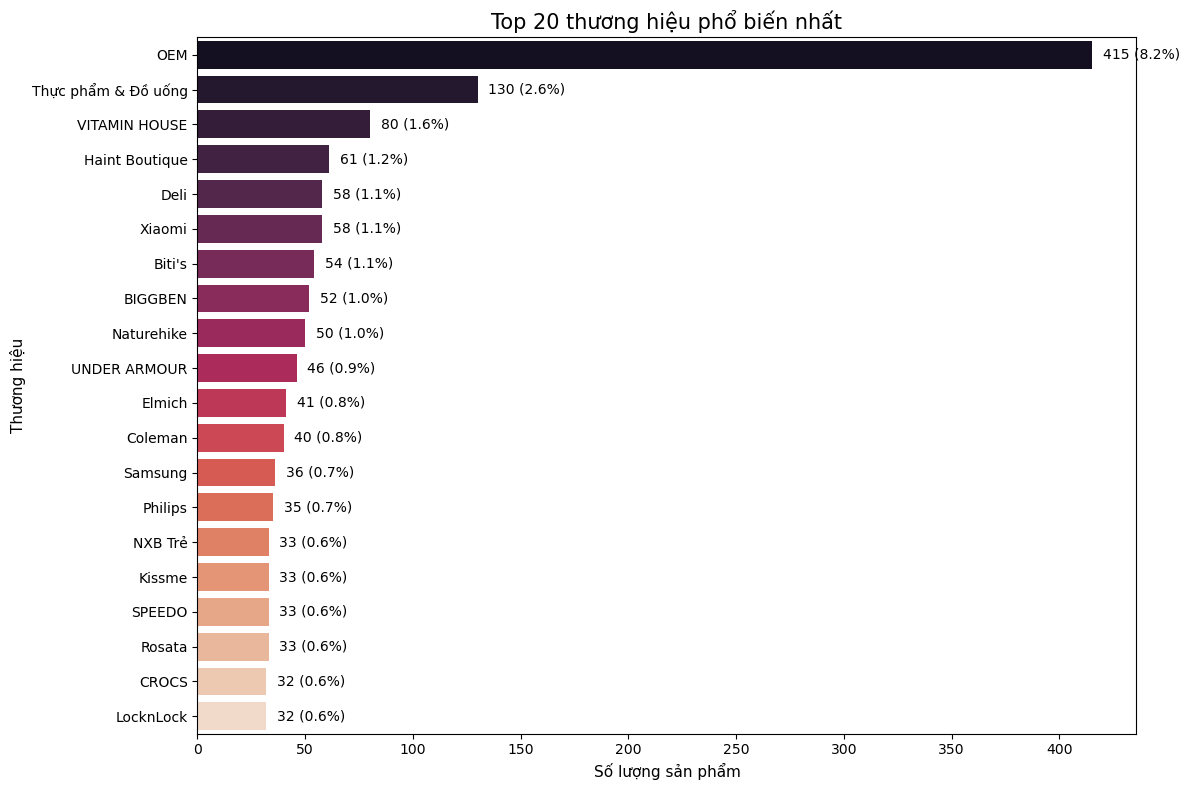

In [25]:
plt.figure(figsize=(12, 8))

top_20_brands = (
    df_cleaned["brand"]
    .value_counts()
    .head(20)
)

ax = sns.barplot(
    x=top_20_brands.values,
    y=top_20_brands.index,
    palette="rocket"
)

plt.title("Top 20 thương hiệu phổ biến nhất", fontsize=15)
plt.xlabel("Số lượng sản phẩm", fontsize=11)
plt.ylabel("Thương hiệu", fontsize=11)

#Ghi giá trị + %
total = len(df_cleaned)

for p in ax.patches:
    width = p.get_width()
    percent = width / total * 100
    ax.text(
        width + 5,
        p.get_y() + p.get_height() / 2,
        f"{int(width)} ({percent:.1f}%)",
        va="center",
        fontsize=10
    )

plt.tight_layout()
plt.savefig(
    "../visualizations/02_top_brands.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()

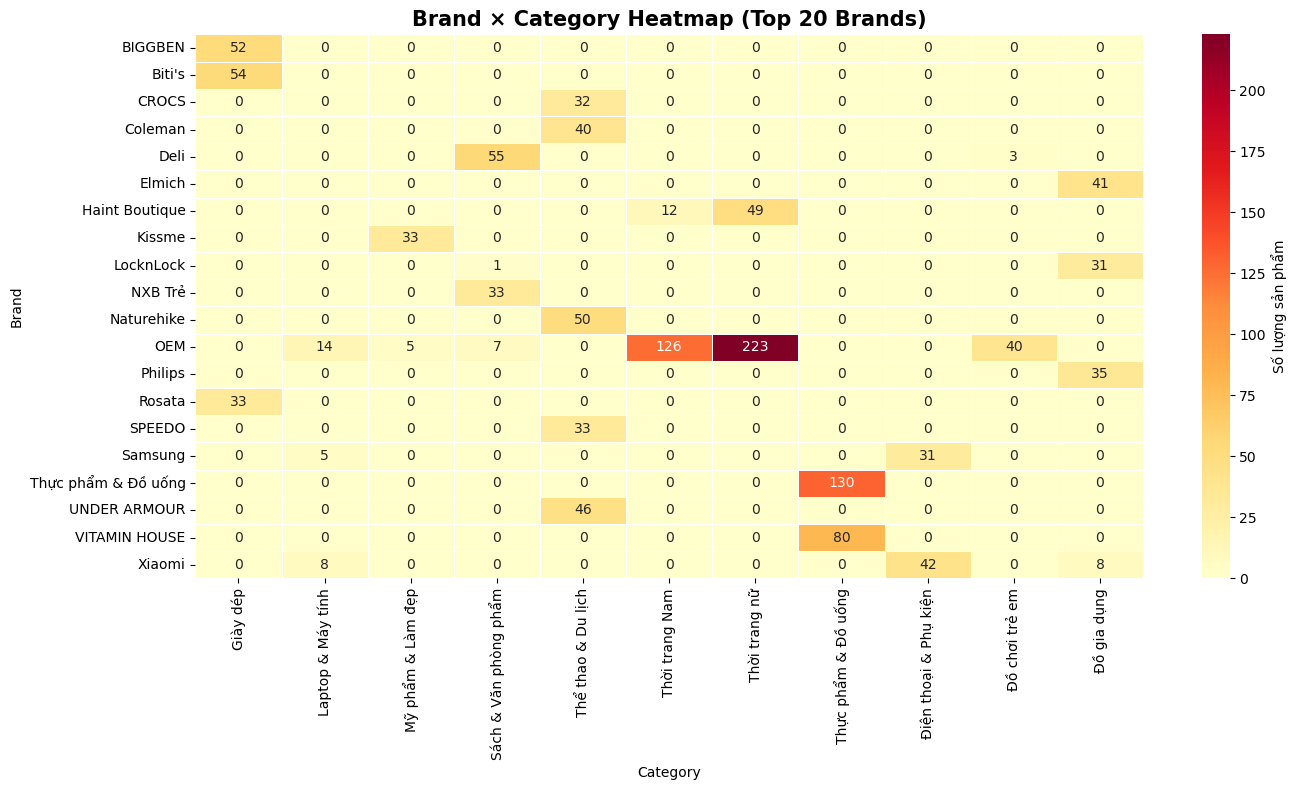

In [26]:
df_top = df_cleaned[df_cleaned["brand"].isin(top_brands.index)]
brand_category_matrix = pd.pivot_table(
    df_top,
    index="brand",
    columns="category",
    values="product_name",
    aggfunc="count",
    fill_value=0
)
plt.figure(figsize=(14, 8))

sns.heatmap(
    brand_category_matrix,
    annot=True,
    fmt="d",
    cmap="YlOrRd",
    linewidths=0.5,
    cbar_kws={"label": "Số lượng sản phẩm"}
)

plt.title(
    "Brand × Category Heatmap (Top 20 Brands)",
    fontsize=15,
    weight="bold"
)
plt.xlabel("Category")
plt.ylabel("Brand")

plt.tight_layout()
plt.savefig("../visualizations/03_brand_category_heatmap.png", dpi=300)
plt.show()

# II. TEXT CHARACTERISTICS ANALYSIS
## 1. Phân bổ số từ

In [27]:
df_cleaned['name_length'] = df_cleaned['product_name'].str.len()
df_cleaned['desc_length'] = df_cleaned['description'].str.len()
df_cleaned['name_word_count'] = df_cleaned['product_name'].str.split().str.len()
df_cleaned['desc_word_count'] = df_cleaned['description'].str.split().str.len()

print("Thống kê độ dài:")
print(f"Product name - Trung bình: {df_cleaned['name_length'].mean():.1f} ký tự")
print(f"Description - Trung bình: {df_cleaned['desc_length'].mean():.1f} ký tự")
print(f"Product name - Trung bình: {df_cleaned['name_word_count'].mean():.1f} từ")
print(f"Description - Trung bình: {df_cleaned['desc_word_count'].mean():.1f} từ")

Thống kê độ dài:
Product name - Trung bình: 61.7 ký tự
Description - Trung bình: 1283.7 ký tự
Product name - Trung bình: 13.2 từ
Description - Trung bình: 288.9 từ


In [28]:
df_cleaned["name_word_count"].describe()

count    5091.000000
mean       13.211353
std         6.731164
min         2.000000
25%         8.000000
50%        11.000000
75%        17.000000
max        59.000000
Name: name_word_count, dtype: float64

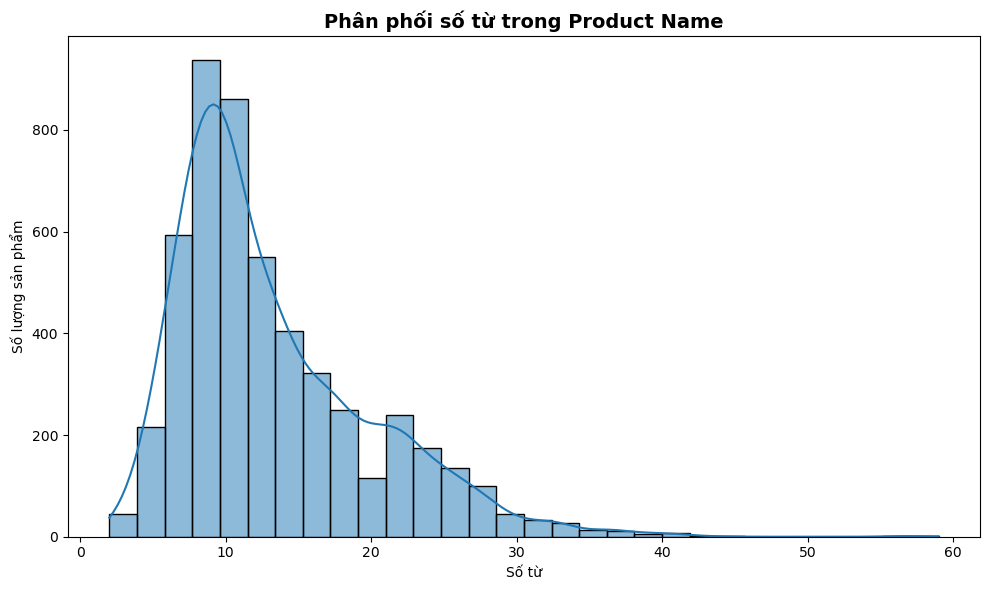

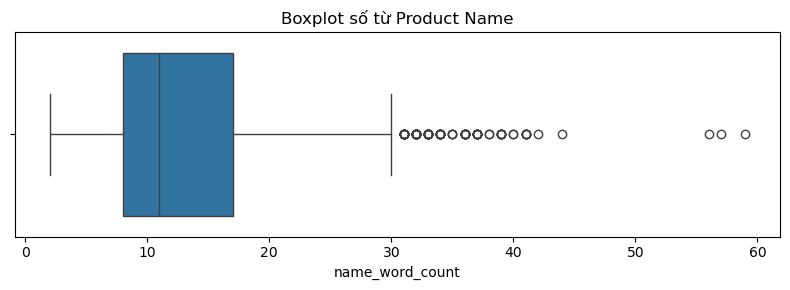

In [29]:
plt.figure(figsize=(10, 6))

sns.histplot(
    df_cleaned["name_word_count"],
    bins=30,
    kde=True
)

plt.title("Phân phối số từ trong Product Name", fontsize=14, weight="bold")
plt.xlabel("Số từ")
plt.ylabel("Số lượng sản phẩm")

plt.tight_layout()
plt.savefig("../visualizations/04_name_word_distribution.png", dpi=300)
plt.show()

plt.figure(figsize=(8, 3))
sns.boxplot(x=df_cleaned["name_word_count"])
plt.title("Boxplot số từ Product Name")
plt.tight_layout()
plt.savefig("../visualizations/05_name_word_boxplot.png", dpi=300)
plt.show()

In [30]:
df_cleaned["desc_word_count"].describe()

count    5091.000000
mean      288.923591
std       245.480565
min         5.000000
25%       108.000000
50%       223.000000
75%       411.500000
max      3135.000000
Name: desc_word_count, dtype: float64

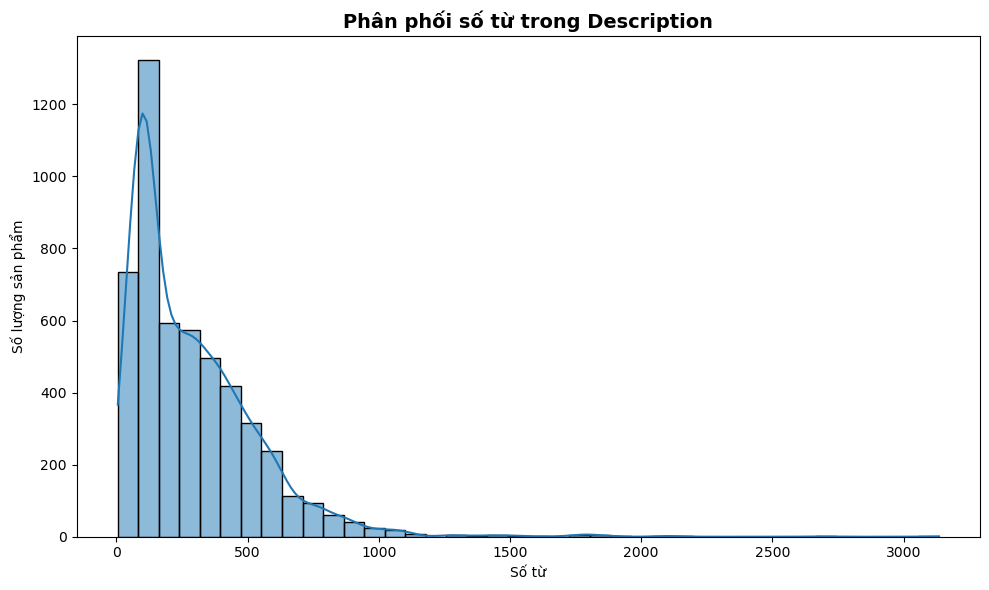

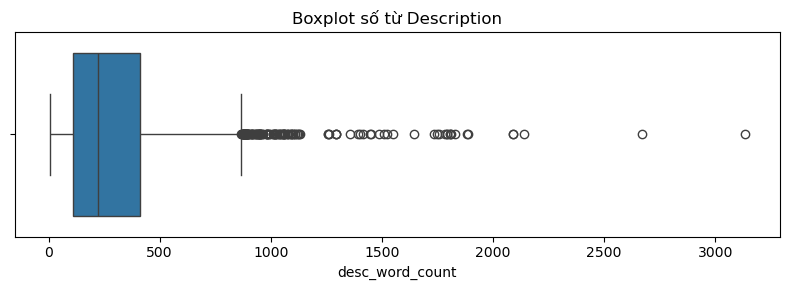

In [31]:
plt.figure(figsize=(10, 6))

sns.histplot(
    df_cleaned["desc_word_count"],
    bins=40,
    kde=True
)

plt.title("Phân phối số từ trong Description", fontsize=14, weight="bold")
plt.xlabel("Số từ")
plt.ylabel("Số lượng sản phẩm")

plt.tight_layout()
plt.savefig("../visualizations/06_description_word_distribution.png", dpi=300)
plt.show()

plt.figure(figsize=(8, 3))
sns.boxplot(x=df_cleaned["desc_word_count"])
plt.title("Boxplot số từ Description")
plt.tight_layout()
plt.savefig("../visualizations/07_description_word_boxplot.png", dpi=300)
plt.show()

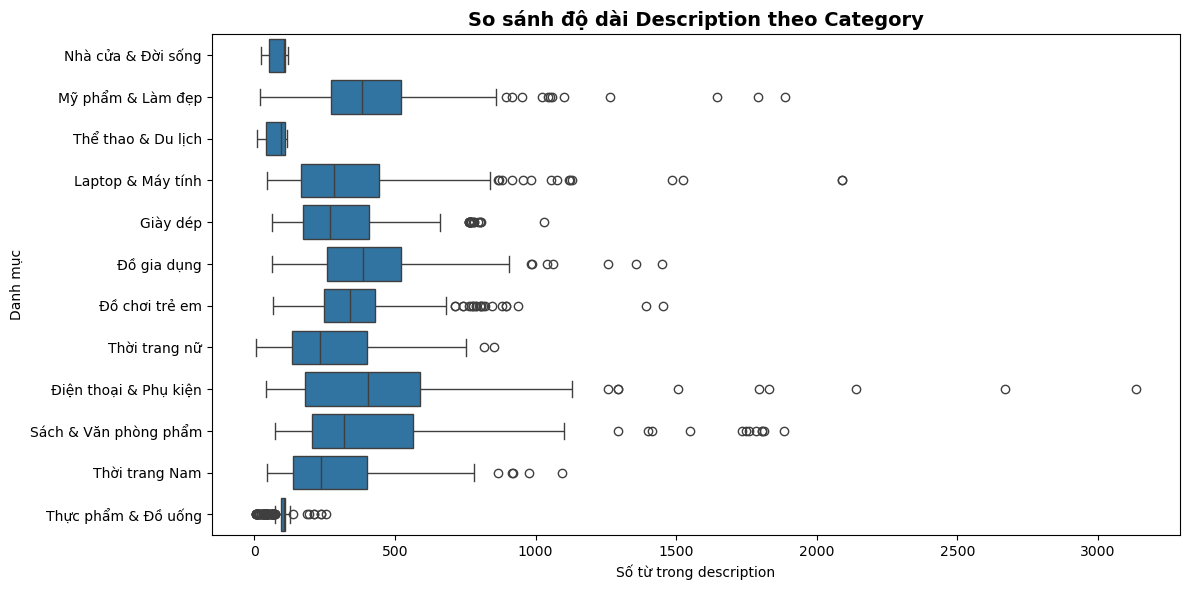

In [32]:
plt.figure(figsize=(12, 6))

sns.boxplot(
    y="category",
    x="desc_word_count",
    data=df_cleaned
)

plt.title("So sánh độ dài Description theo Category", fontsize=14, weight="bold")
plt.xlabel("Số từ trong description")
plt.ylabel("Danh mục")

plt.tight_layout()
plt.savefig("../visualizations/08_desc_length_by_category.png", dpi=300)
plt.show()

In [33]:
%pip install underthesea wordcloud

Note: you may need to restart the kernel to use updated packages.


## 2. WordCloud

In [34]:
from wordcloud import WordCloud
from underthesea import word_tokenize

In [35]:
vietnamese_stopwords = set([
    "và", "là", "có", "cho", "với", "các", "được", "trong", "khi", "từ",
    "sản", "phẩm", "này", "không", "một", "những", "đến", "theo",
    "giúp", "đảm", "bảo", "hàng", "chính", "hãng", "của", "tại", "rất", "sản_phẩm", "chính_hãng", "bảo_hành", "thương_hiệu", 
    "chất_lượng", "cao_cấp", "thiết_kế", "sử_dụng", "thời_gian",
    "cam_kết", "uy_tín", "hỗ_trợ", "miễn_phí", "giao_hàng", "toàn_quốc", "đổi_trả", "dễ_dàng", "tiện_lợi"
])
def tokenize_and_remove_stopwords(text):
    if not isinstance(text, str) or text.strip() == "":
        return ""
    
    tokens = word_tokenize(text, format="text").split()
    
    clean_tokens = []
    for token in tokens:
        token_lower = token.lower()
        if (token_lower not in vietnamese_stopwords) and \
           (not token.isnumeric()) and \
           (len(token) > 1) and \
           (token.isalnum() or "_" in token):
            clean_tokens.append(token)
    return " ".join(clean_tokens)

In [36]:
df_cleaned["desc_tokenized"] = df_cleaned["description"].apply(tokenize_and_remove_stopwords)
df_cleaned["name_tokenized"]= df_cleaned["product_name"].apply(tokenize_and_remove_stopwords)

In [37]:
def get_top_keywords(text_series, n=10):
    all_words = ' '.join(text_series).split()
    return Counter(all_words).most_common(n)

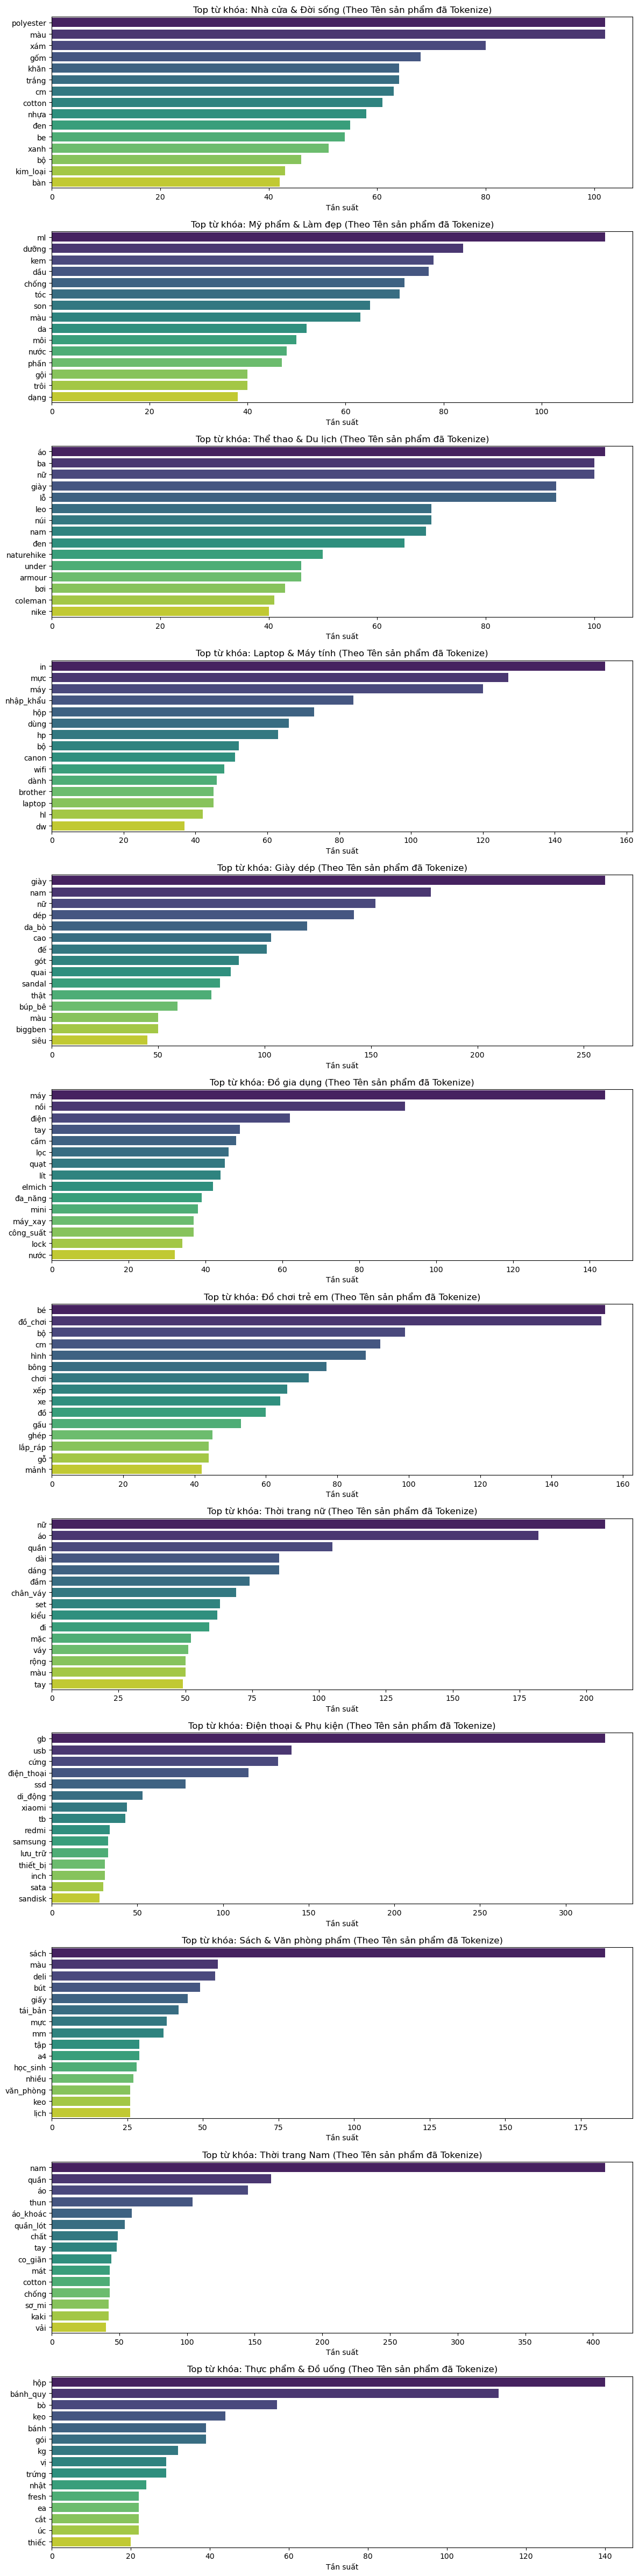

In [38]:
categories = df_cleaned['category'].unique()
fig, axes = plt.subplots(nrows=len(categories), ncols=1, figsize=(12, 4 * len(categories)))

for i, cat in enumerate(categories):
    subset = df_cleaned[df_cleaned['category'] == cat]
    
    top_words = get_top_keywords(subset['name_tokenized'], n=15)    
    words = [w[0] for w in top_words]
    counts = [w[1] for w in top_words]
    
    ax = axes[i] if len(categories) > 1 else axes
    sns.barplot(x=counts, y=words, hue=words, legend=False, ax=axes[i], palette='viridis')
    ax.set_title(f"Top từ khóa: {cat} (Theo Tên sản phẩm đã Tokenize)")
    ax.set_xlabel("Tần suất")

plt.tight_layout()
plt.savefig("../visualizations/09_top_keywords_per_category.png", dpi=300)
plt.show()

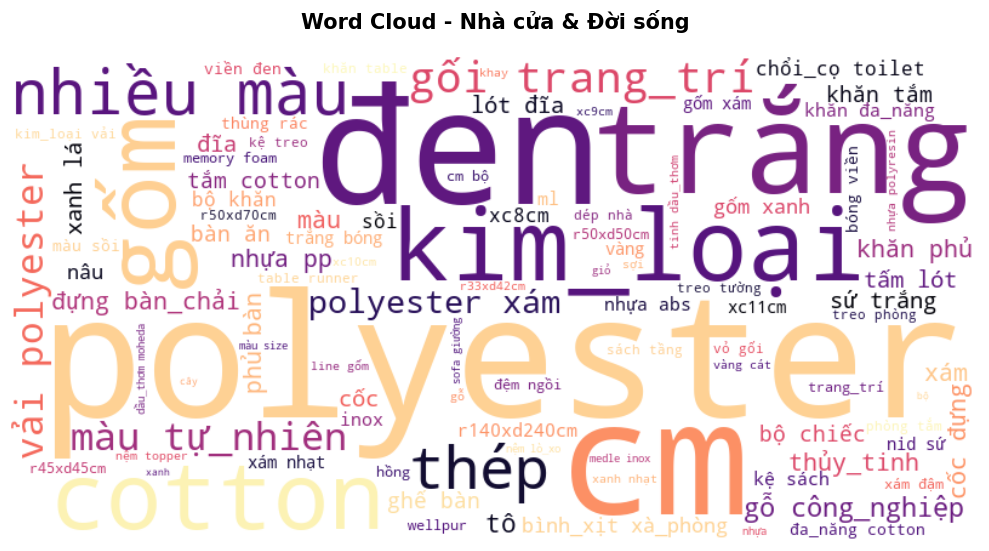

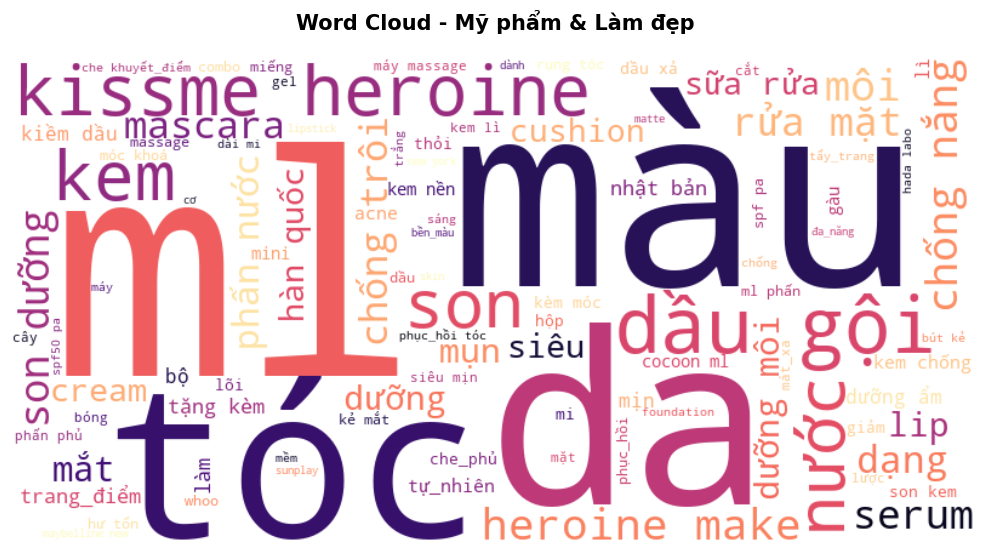

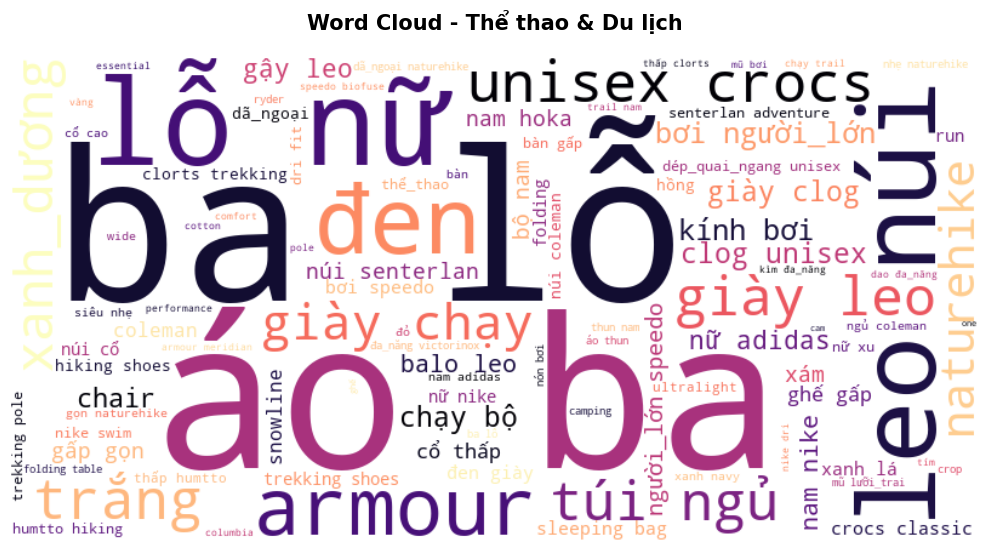

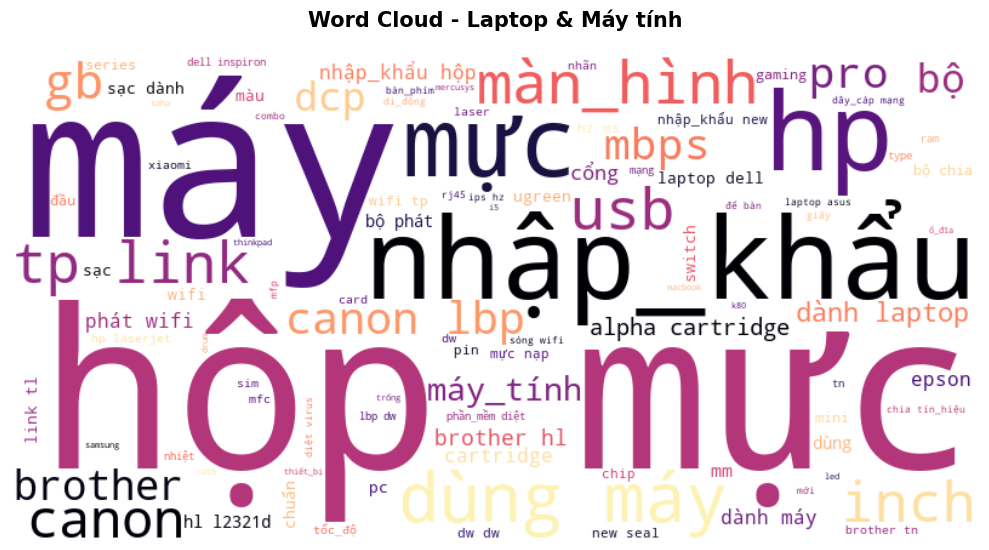

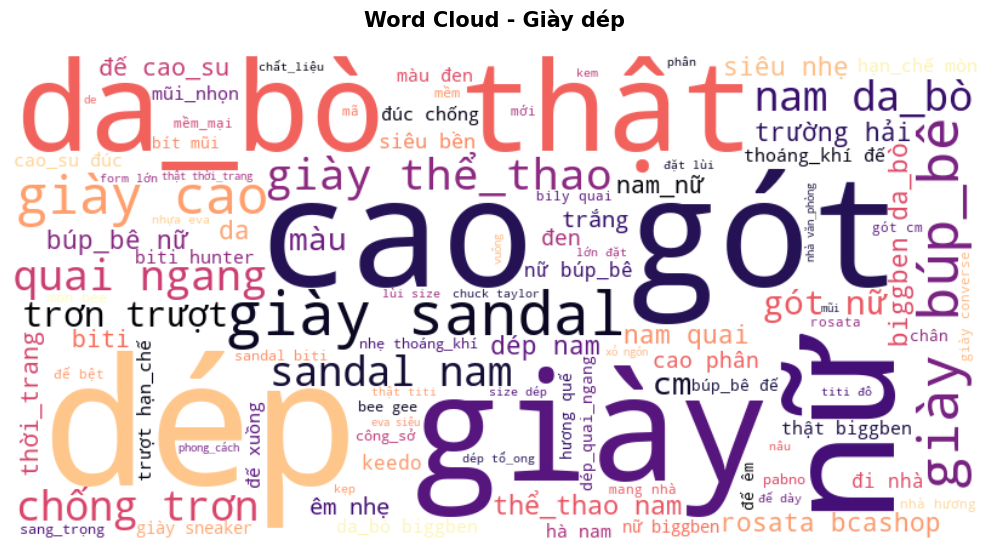

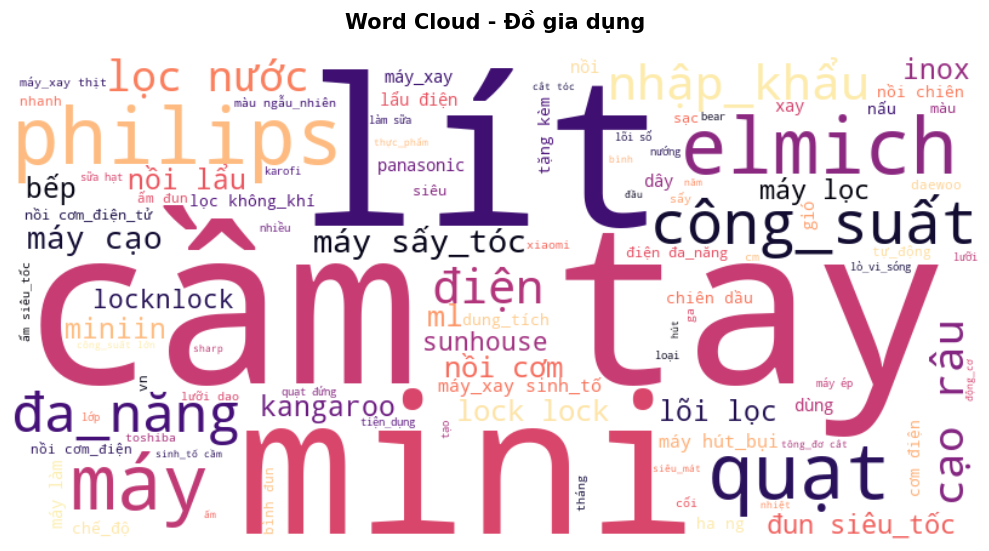

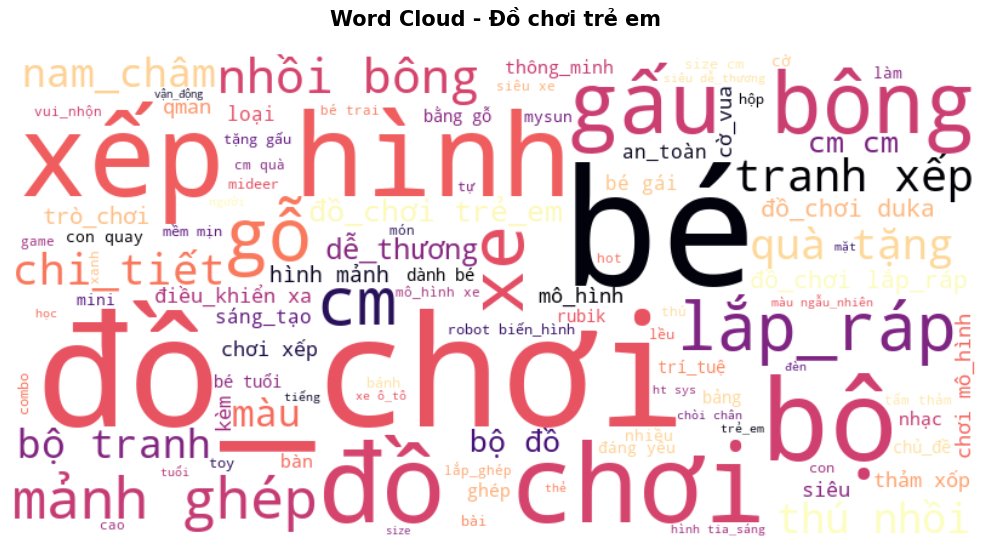

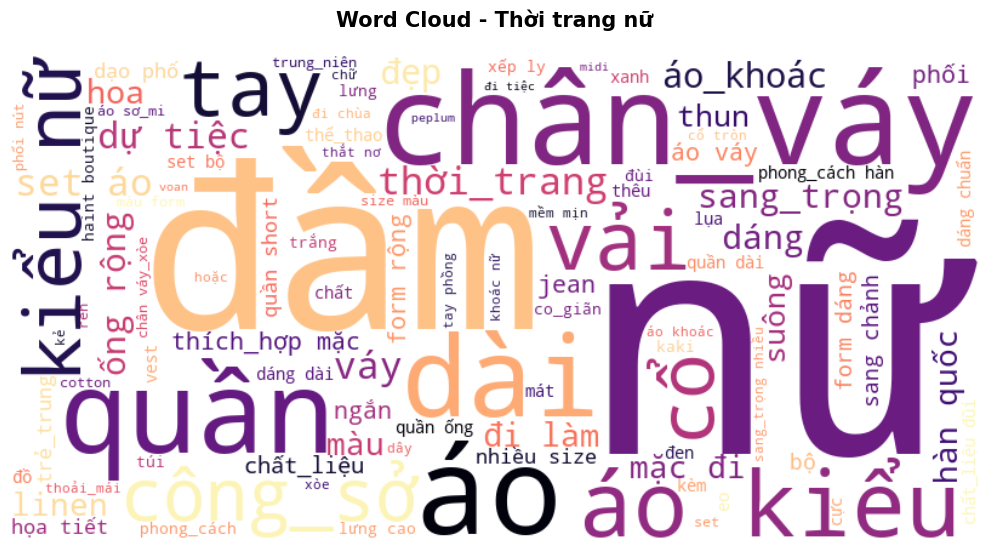

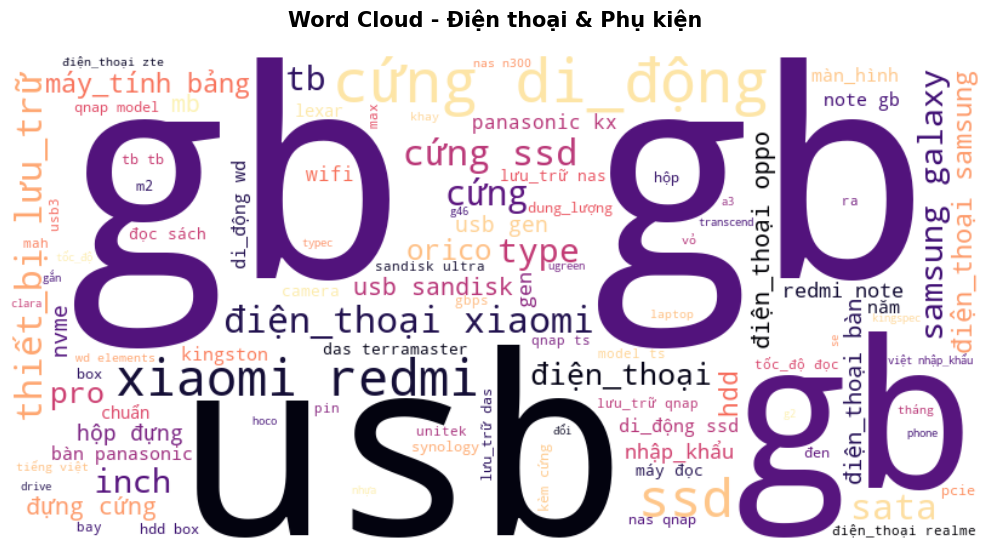

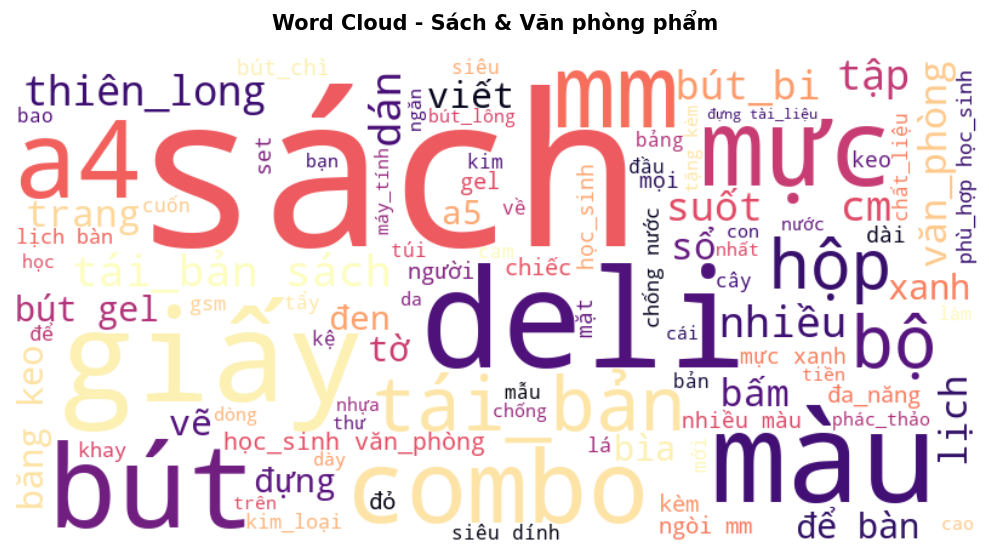

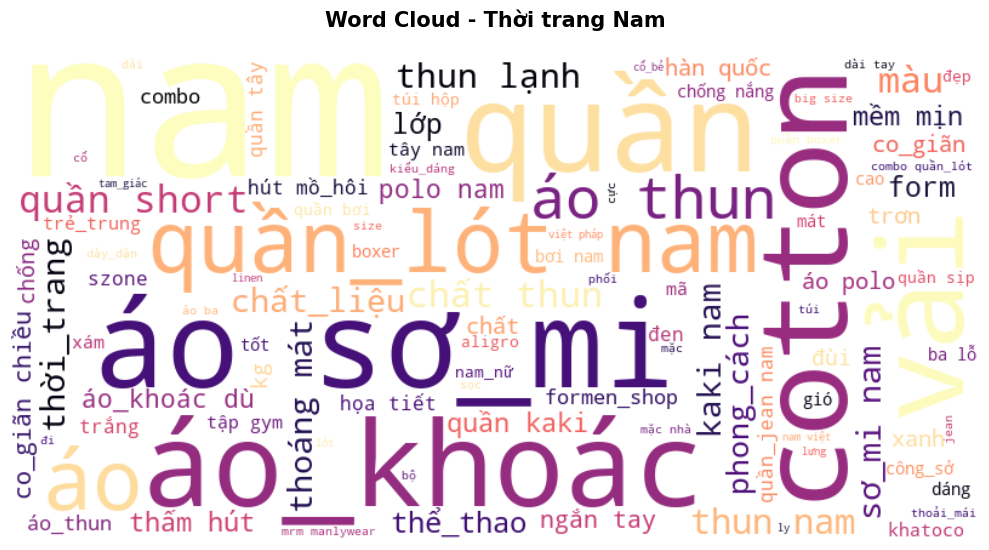

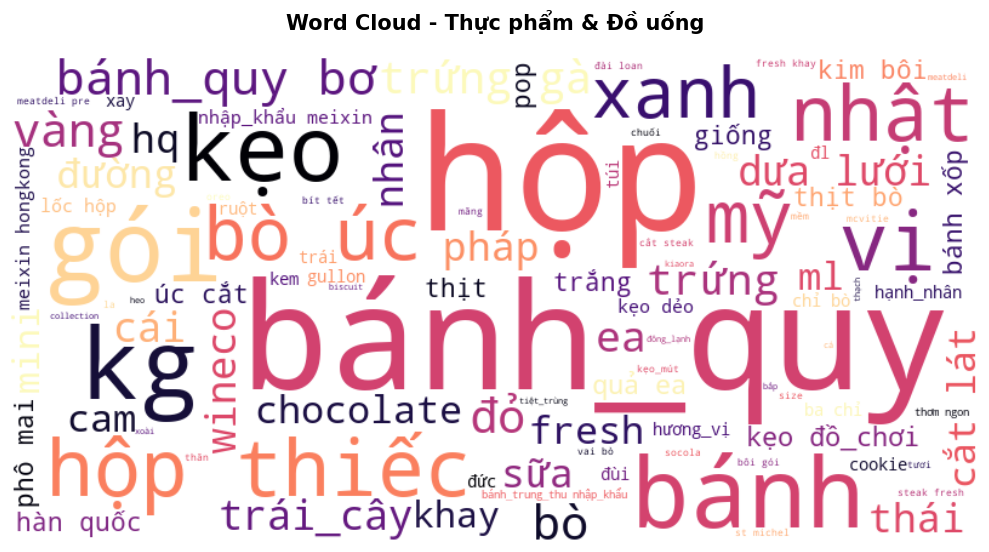

In [39]:
start = 10
for i, cat in enumerate(categories):
    text = ' '.join(df_cleaned[df_cleaned['category'] == cat]['name_tokenized'])
    
    wc = WordCloud(
        width=800, height=400,
        background_color='white',
        max_words=100,
        colormap='magma'  
    ).generate(text)

    plt.figure(figsize=(10, 6))  
    save_path = f"../visualizations/{start:02d}_wordcloud_{cat}.png"
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud - {cat}", fontsize=15, pad = 20, weight = 'bold')
    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()
    start += 1